<a href="https://colab.research.google.com/github/sharvani1357/Ridge-lasso-naive_bayes/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [6]:
df=pd.read_csv('spam.csv', encoding='latin1')[['v1','v2']]
df.columns=['label','text']

df['label']=df['label'].map({'ham':0,'spam':1})
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


## 1.Gaussian Naive Bayes (For Continuous Data)

In [31]:
from matplotlib.collections import StarPolygonCollection
# Feature Engineering: Extract numerical features
df['text_length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))
# Define features and target
X = df[['text_length', 'num_words', 'num_digits']]
y = df['label']
#split dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#standardize features
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train_scaled,y_train)
y_pred_gnb=gnb.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred_gnb)
print(f'Accuracy:{accuracy}')
print(f"classification report:\n{classification_report(y_test,y_pred_gnb)}")

Accuracy:0.9802690582959641
classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [32]:
print(f"confusion matrix:\n{confusion_matrix(y_test,y_pred_gnb)}")

confusion matrix:
[[953  12]
 [ 10 140]]


## 2.Multinomial Naive Bayes(For Text Data)

In [33]:
#convert text data into word count vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')
x_count=vectorizer.fit_transform(df['text'])
#convert counts to TF-IDF representation
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
x_tfidf=tfidf_transformer.fit_transform(x_count)
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,df['label'],test_size=0.2,random_state=42)
#Train Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)

In [34]:
accuracy=accuracy_score(y_test,y_pred_mnb)
print(f'Accuracy:{accuracy}')
print(f"classification report:\n{classification_report(y_test,y_pred_mnb)}")

Accuracy:0.968609865470852
classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [35]:
print(f"confusion matrix:\n{confusion_matrix(y_test,y_pred_mnb)}")

confusion matrix:
[[965   0]
 [ 35 115]]


##3.Bernoulli Naive Bayes(For Binary Features)

In [36]:
#convert  text into binary presence/absence of important words
important_words=["free","win","offer","money","urgent"]
for word in important_words:
    df[word]=df['text'].apply(lambda x: 1 if word in x.lower() else 0)
x=df[important_words]
y=df['label']
#slit dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Train Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)

In [37]:
accuracy=accuracy_score(y_test,y_pred_bnb)
print(f'Accuracy:{accuracy}')
print(f"classification report:\n{classification_report(y_test,y_pred_bnb)}")

Accuracy:0.895067264573991
classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115



In [38]:
print(f"confusion matrix:\n{confusion_matrix(y_test,y_pred_bnb)}")

confusion matrix:
[[929  36]
 [ 81  69]]


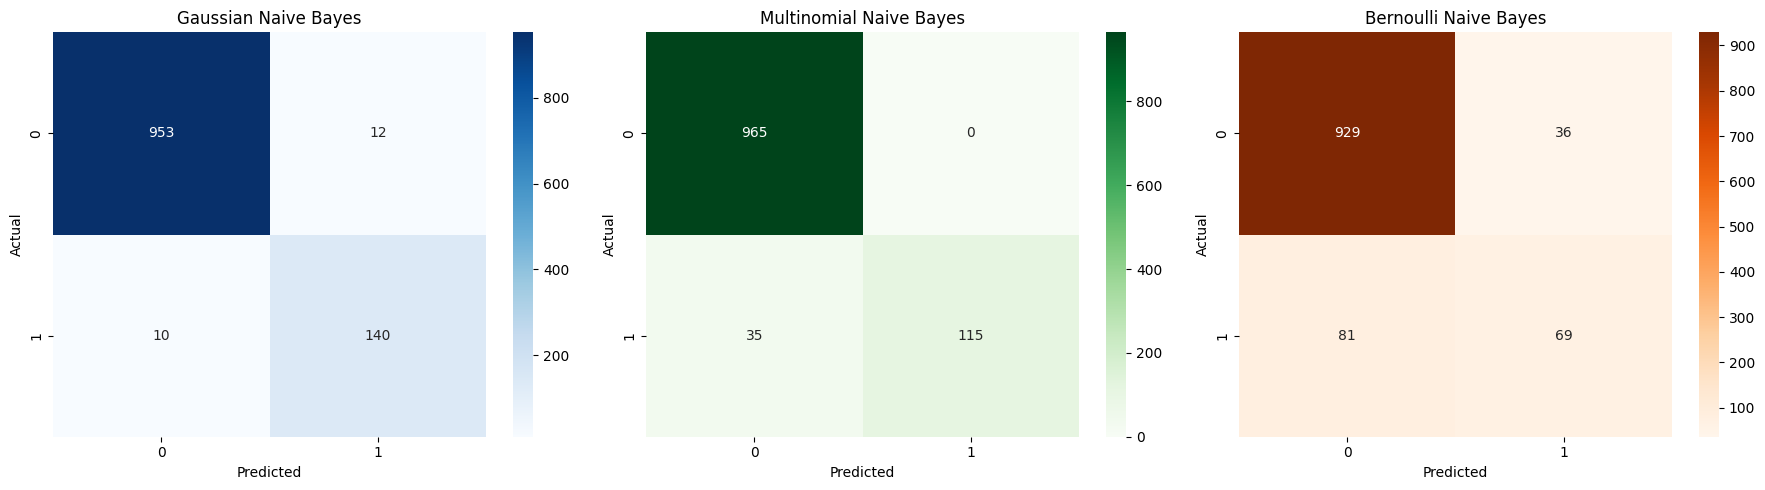

In [39]:
#print all 3 gaussian,multinomial,bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# compute confusion matrices
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

# create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gaussian Naive Bayes
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Gaussian Naive Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Multinomial Naive Bayes
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Multinomial Naive Bayes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Bernoulli Naive Bayes
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("Bernoulli Naive Bayes")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [41]:
df['label'].value_counts()

,count
label,
0,4825
1,747


ham->not suspicious
spam->supicious


Customer user-entered messages predicting


In [45]:
def predict_message(msg):
    msg_count = vectorizer.transform([msg])
    msg_tfidf = tfidf_transformer.transform(msg_count)
    prediction = mnb.predict(msg_tfidf)
    return "Suspicious" if prediction[0] == "spam" else "Not Suspicious"

# test
print(predict_message("congrants you have selected."))

Not Suspicious


[[tn,tp
  fn,fp]]